In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

import json

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm

In [2]:
software = []
with open('Software.json', 'r') as file:
    for line in file:
        software.append(json.loads(line))

In [3]:
type(software)

list

In [4]:
software[:5]

[{'overall': 4.0,
  'verified': True,
  'reviewTime': '03 11, 2014',
  'reviewerID': 'A240ORQ2LF9LUI',
  'asin': '0077613252',
  'style': {'Format:': ' Loose Leaf'},
  'reviewerName': 'Michelle W',
  'reviewText': "The materials arrived early and were in excellent condition.  However for the money spent they really should've come with a binder and not just loose leaf.",
  'summary': 'Material Great',
  'unixReviewTime': 1394496000},
 {'overall': 4.0,
  'verified': True,
  'reviewTime': '02 23, 2014',
  'reviewerID': 'A1YCCU0YRLS0FE',
  'asin': '0077613252',
  'style': {'Format:': ' Loose Leaf'},
  'reviewerName': 'Rosalind White Ames',
  'reviewText': 'I am really enjoying this book with the worksheets that make you review your goals, what to do when you do not make it, it reminds me  of my human sexuality classwork.',
  'summary': 'Health',
  'unixReviewTime': 1393113600},
 {'overall': 1.0,
  'vote': '7',
  'verified': True,
  'reviewTime': '02 17, 2014',
  'reviewerID': 'A1BJHRQDYVAY

In [5]:
df = pd.DataFrame.from_records(software)

In [7]:
df = df[['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime']]
df.head()

overall  verified   reviewTime      reviewerID        asin  \
0      4.0      True  03 11, 2014  A240ORQ2LF9LUI  0077613252   
1      4.0      True  02 23, 2014  A1YCCU0YRLS0FE  0077613252   
2      1.0      True  02 17, 2014  A1BJHRQDYVAY2J  0077613252   
3      3.0      True  02 17, 2014   APRDVZ6QBIQXT  0077613252   
4      5.0     False  10 14, 2013  A2JZTTBSLS1QXV  0077775473   

                        style         reviewerName  \
0  {'Format:': ' Loose Leaf'}           Michelle W   
1  {'Format:': ' Loose Leaf'}  Rosalind White Ames   
2  {'Format:': ' Loose Leaf'}       Allan R. Baker   
3  {'Format:': ' Loose Leaf'}                 Lucy   
4                         NaN            Albert V.   

                                          reviewText  \
0  The materials arrived early and were in excell...   
1  I am really enjoying this book with the worksh...   
2  IF YOU ARE TAKING THIS CLASS DON"T WASTE YOUR ...   
3  This book was missing pages!!! Important pages...   
4  I have used LearnSmart and can officially say ...   

                         summary  unixReviewTime  
0                 Material Great      1394496000  
1                         Health      1393113600  
2             ARE YOU KIDING ME?      1392595200  
3                missing pages!!      1392595200  
4  Best study product out there!      1381708800

In [8]:
df.shape

(459436, 10)

In [9]:
df['year_review'] = df['reviewTime'].str[-4:]
df.head()

overall  verified   reviewTime      reviewerID        asin  \
0      4.0      True  03 11, 2014  A240ORQ2LF9LUI  0077613252   
1      4.0      True  02 23, 2014  A1YCCU0YRLS0FE  0077613252   
2      1.0      True  02 17, 2014  A1BJHRQDYVAY2J  0077613252   
3      3.0      True  02 17, 2014   APRDVZ6QBIQXT  0077613252   
4      5.0     False  10 14, 2013  A2JZTTBSLS1QXV  0077775473   

                        style         reviewerName  \
0  {'Format:': ' Loose Leaf'}           Michelle W   
1  {'Format:': ' Loose Leaf'}  Rosalind White Ames   
2  {'Format:': ' Loose Leaf'}       Allan R. Baker   
3  {'Format:': ' Loose Leaf'}                 Lucy   
4                         NaN            Albert V.   

                                          reviewText  \
0  The materials arrived early and were in excell...   
1  I am really enjoying this book with the worksh...   
2  IF YOU ARE TAKING THIS CLASS DON"T WASTE YOUR ...   
3  This book was missing pages!!! Important pages...   
4  I have used LearnSmart and can officially say ...   

                         summary  unixReviewTime year_review  
0                 Material Great      1394496000        2014  
1                         Health      1393113600        2014  
2             ARE YOU KIDING ME?      1392595200        2014  
3                missing pages!!      1392595200        2014  
4  Best study product out there!      1381708800        2013

In [12]:
df.reviewText.isnull().value_counts()

reviewText
False    459370
True         66
Name: count, dtype: int64

In [14]:
df[df['reviewText'].isnull()]
#df.reviewText.isnull().value_counts()

overall  verified   reviewTime      reviewerID        asin  \
54226       5.0      True  06 10, 2012  A1J59HUIE22VK6  B000XYUSMI   
62732       5.0      True  06 10, 2012  A1J59HUIE22VK6  B000XYUSMI   
70273       4.0      True  07 11, 2014  A16YPRS120VV5R  B001B057U6   
86543       5.0      True   05 3, 2018   A461O3V81H0GY  B002IKIHEG   
86904       5.0      True  11 19, 2014   A4EFRSUB5W8Y7  B002IKIHEG   
...         ...       ...          ...             ...         ...   
453877      5.0      True   07 5, 2018  A1HUGNK5PTQBV6  B0130P9E0I   
454201      5.0      True   04 2, 2018  A1K19WSFBM8C6C  B013EXF9T6   
456027      1.0      True  07 18, 2018    AUGXBAROCF67  B01617VPUY   
456446      5.0     False  03 28, 2016  A109P5888SV0N1  B016RRQD5A   
457789      5.0      True   09 8, 2016  A2XVIPCC60UA6W  B01B8ORCF2   

                               style     reviewerName reviewText  \
54226                            NaN            chale        NaN   
62732                            NaN            chale        NaN   
70273                            NaN        Boon Kiat        NaN   
86543            {'Format:': ' DVD'}              joe        NaN   
86904   {'Format:': ' Amazon Video'}         Marlin G        NaN   
...                              ...              ...        ...   
453877                           NaN  Amazon Customer        NaN   
454201                           NaN         Joe Mama        NaN   
456027  {'Platform:': ' PC/MacDisc'}              JLO        NaN   
456446                           NaN              a b        NaN   
457789                           NaN  Amazon Customer        NaN   

                                                  summary  unixReviewTime  \
54226                                      hallmark/kodak      1339286400   
62732                                      hallmark/kodak      1339286400   
70273                                          Four Stars      1405036800   
86543                                          Five Stars      1525305600   
86904                                          Five Stars      1416355200   
...                                                   ...             ...   
453877                                                NaN      1530748800   
454201                                         Five Stars      1522627200   
456027  They sent a basic knowingly . After advertisin...      1531872000   
456446                                         Five Stars      1459123200   
457789                                    Buy this manual      1473292800   

       year_review  
54226         2012  
62732         2012  
70273         2014  
86543         2018  
86904         2014  
...            ...  
453877        2018  
454201        2018  
456027        2018  
456446        2016  
457789        2016  

[66 rows x 11 columns]

In [15]:
df = df[~df['reviewText'].isnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 459370 entries, 0 to 459435
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         459370 non-null  float64
 1   verified        459370 non-null  bool   
 2   reviewTime      459370 non-null  object 
 3   reviewerID      459370 non-null  object 
 4   asin            459370 non-null  object 
 5   style           234367 non-null  object 
 6   reviewerName    459346 non-null  object 
 7   reviewText      459370 non-null  object 
 8   summary         459320 non-null  object 
 9   unixReviewTime  459370 non-null  int64  
 10  year_review     459370 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(8)
memory usage: 39.0+ MB


In [16]:
df.reviewText.isnull().value_counts()

reviewText
False    459370
Name: count, dtype: int64

In [17]:
df.overall.unique()

array([4., 1., 3., 5., 2.])

In [18]:
df.overall.value_counts(normalize=True)

overall
5.0    0.462370
1.0    0.223223
4.0    0.160198
3.0    0.085757
2.0    0.068452
Name: proportion, dtype: float64

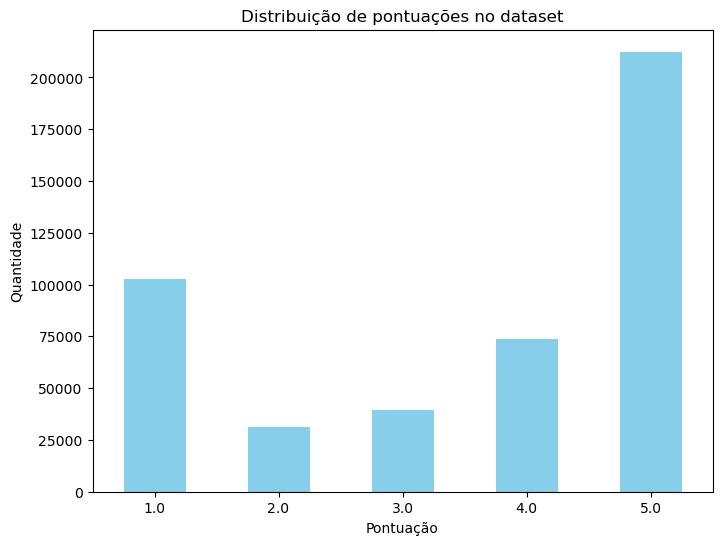

<Figure size 640x480 with 0 Axes>

In [27]:
plt.figure(figsize=(8, 6))
ax = df['overall'].value_counts().sort_index().plot(kind='bar', color='skyblue')

plt.title('Distribuição de pontuações no dataset')
plt.xlabel('Pontuação')
plt.ylabel('Quantidade')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

plt.savefig("Images/dist_pontuacao.png")

In [29]:
df.year_review.value_counts(normalize=True)

year_review
2015    0.187879
2014    0.168368
2016    0.145351
2013    0.101580
2017    0.063868
2012    0.049833
2009    0.043538
2008    0.038607
2011    0.037140
2010    0.033056
2007    0.030394
2018    0.028537
2006    0.018473
2005    0.014637
2004    0.010199
2003    0.010190
2002    0.009021
2001    0.006167
2000    0.002887
1999    0.000272
1998    0.000002
Name: proportion, dtype: float64

C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_6464\2706978233.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


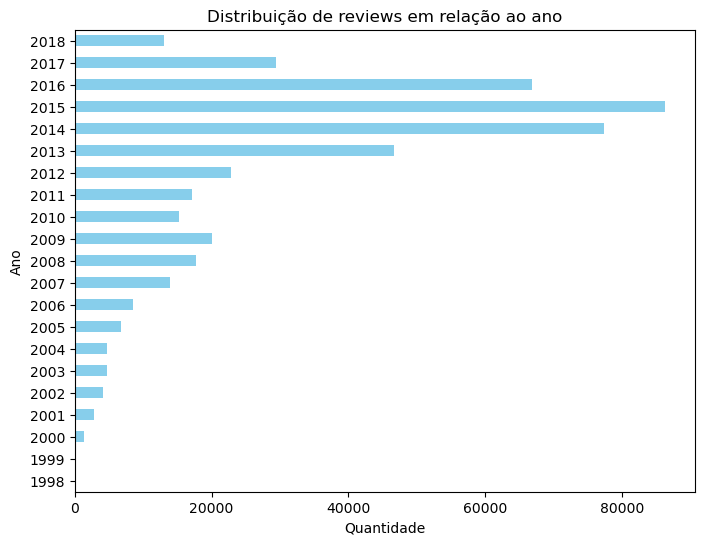

<Figure size 640x480 with 0 Axes>

In [28]:
plt.figure(figsize=(8, 6))
ax = df['year_review'].value_counts().sort_index().plot(kind='barh', color='skyblue')

plt.title('Distribuição de reviews em relação ao ano')
plt.xlabel('Quantidade')
plt.ylabel('Ano')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

plt.savefig("Images/dist_ano.png")

In [30]:
df = df[['overall', 'reviewTime', 'reviewText', 'summary', 'year_review']]
df.head()

overall   reviewTime                                         reviewText  \
0      4.0  03 11, 2014  The materials arrived early and were in excell...   
1      4.0  02 23, 2014  I am really enjoying this book with the worksh...   
2      1.0  02 17, 2014  IF YOU ARE TAKING THIS CLASS DON"T WASTE YOUR ...   
3      3.0  02 17, 2014  This book was missing pages!!! Important pages...   
4      5.0  10 14, 2013  I have used LearnSmart and can officially say ...   

                         summary year_review  
0                 Material Great        2014  
1                         Health        2014  
2             ARE YOU KIDING ME?        2014  
3                missing pages!!        2014  
4  Best study product out there!        2013

In [31]:
df['Sentiment'] = np.where(df['overall'] <= 3.0, 0, 1)
df.Sentiment.value_counts(normalize=True)

Sentiment
1    0.622568
0    0.377432
Name: proportion, dtype: float64

In [32]:
df.shape

(459370, 6)

In [33]:
df.head(10)

overall   reviewTime                                         reviewText  \
0      4.0  03 11, 2014  The materials arrived early and were in excell...   
1      4.0  02 23, 2014  I am really enjoying this book with the worksh...   
2      1.0  02 17, 2014  IF YOU ARE TAKING THIS CLASS DON"T WASTE YOUR ...   
3      3.0  02 17, 2014  This book was missing pages!!! Important pages...   
4      5.0  10 14, 2013  I have used LearnSmart and can officially say ...   
5      4.0  08 15, 2011  Strong backgroung, good read, quite up to date...   
6      3.0   10 9, 2010  If you live on Mars and never heard of the int...   
7      5.0   10 3, 2010  i got this book on amazon and it ended up savi...   
8      5.0   10 3, 2010  I was very happy with this purchase because th...   
9      5.0  05 23, 2010  Recieved in a timely manner- book in great con...   

                                   summary year_review  Sentiment  
0                           Material Great        2014          1  
1                                   Health        2014          1  
2                       ARE YOU KIDING ME?        2014          0  
3                          missing pages!!        2014          0  
4            Best study product out there!        2013          1  
5                       E-marketing 6th ed        2011          1  
6  Mars calling Earth....what is internet?        2010          0  
7       good book, saved me a lot of money        2010          1  
8                               Super fast        2010          1  
9                              E-Marketing        2010          1

In [34]:
df.groupby(by='year_review').agg({'overall': 'mean', 'reviewText':'count'})

overall  reviewText
year_review                      
1998         1.000000           1
1999         4.080000         125
2000         3.805430        1326
2001         3.523120        2833
2002         3.385376        4144
2003         3.029695        4681
2004         2.920171        4685
2005         3.079417        6724
2006         3.134692        8486
2007         3.344936       13962
2008         3.308148       17735
2009         3.463700       20000
2010         3.308792       15185
2011         3.433152       17061
2012         3.493666       22892
2013         3.587532       46663
2014         3.791733       77343
2015         3.608498       86306
2016         3.705496       66770
2017         3.620539       29339
2018         3.512777       13109

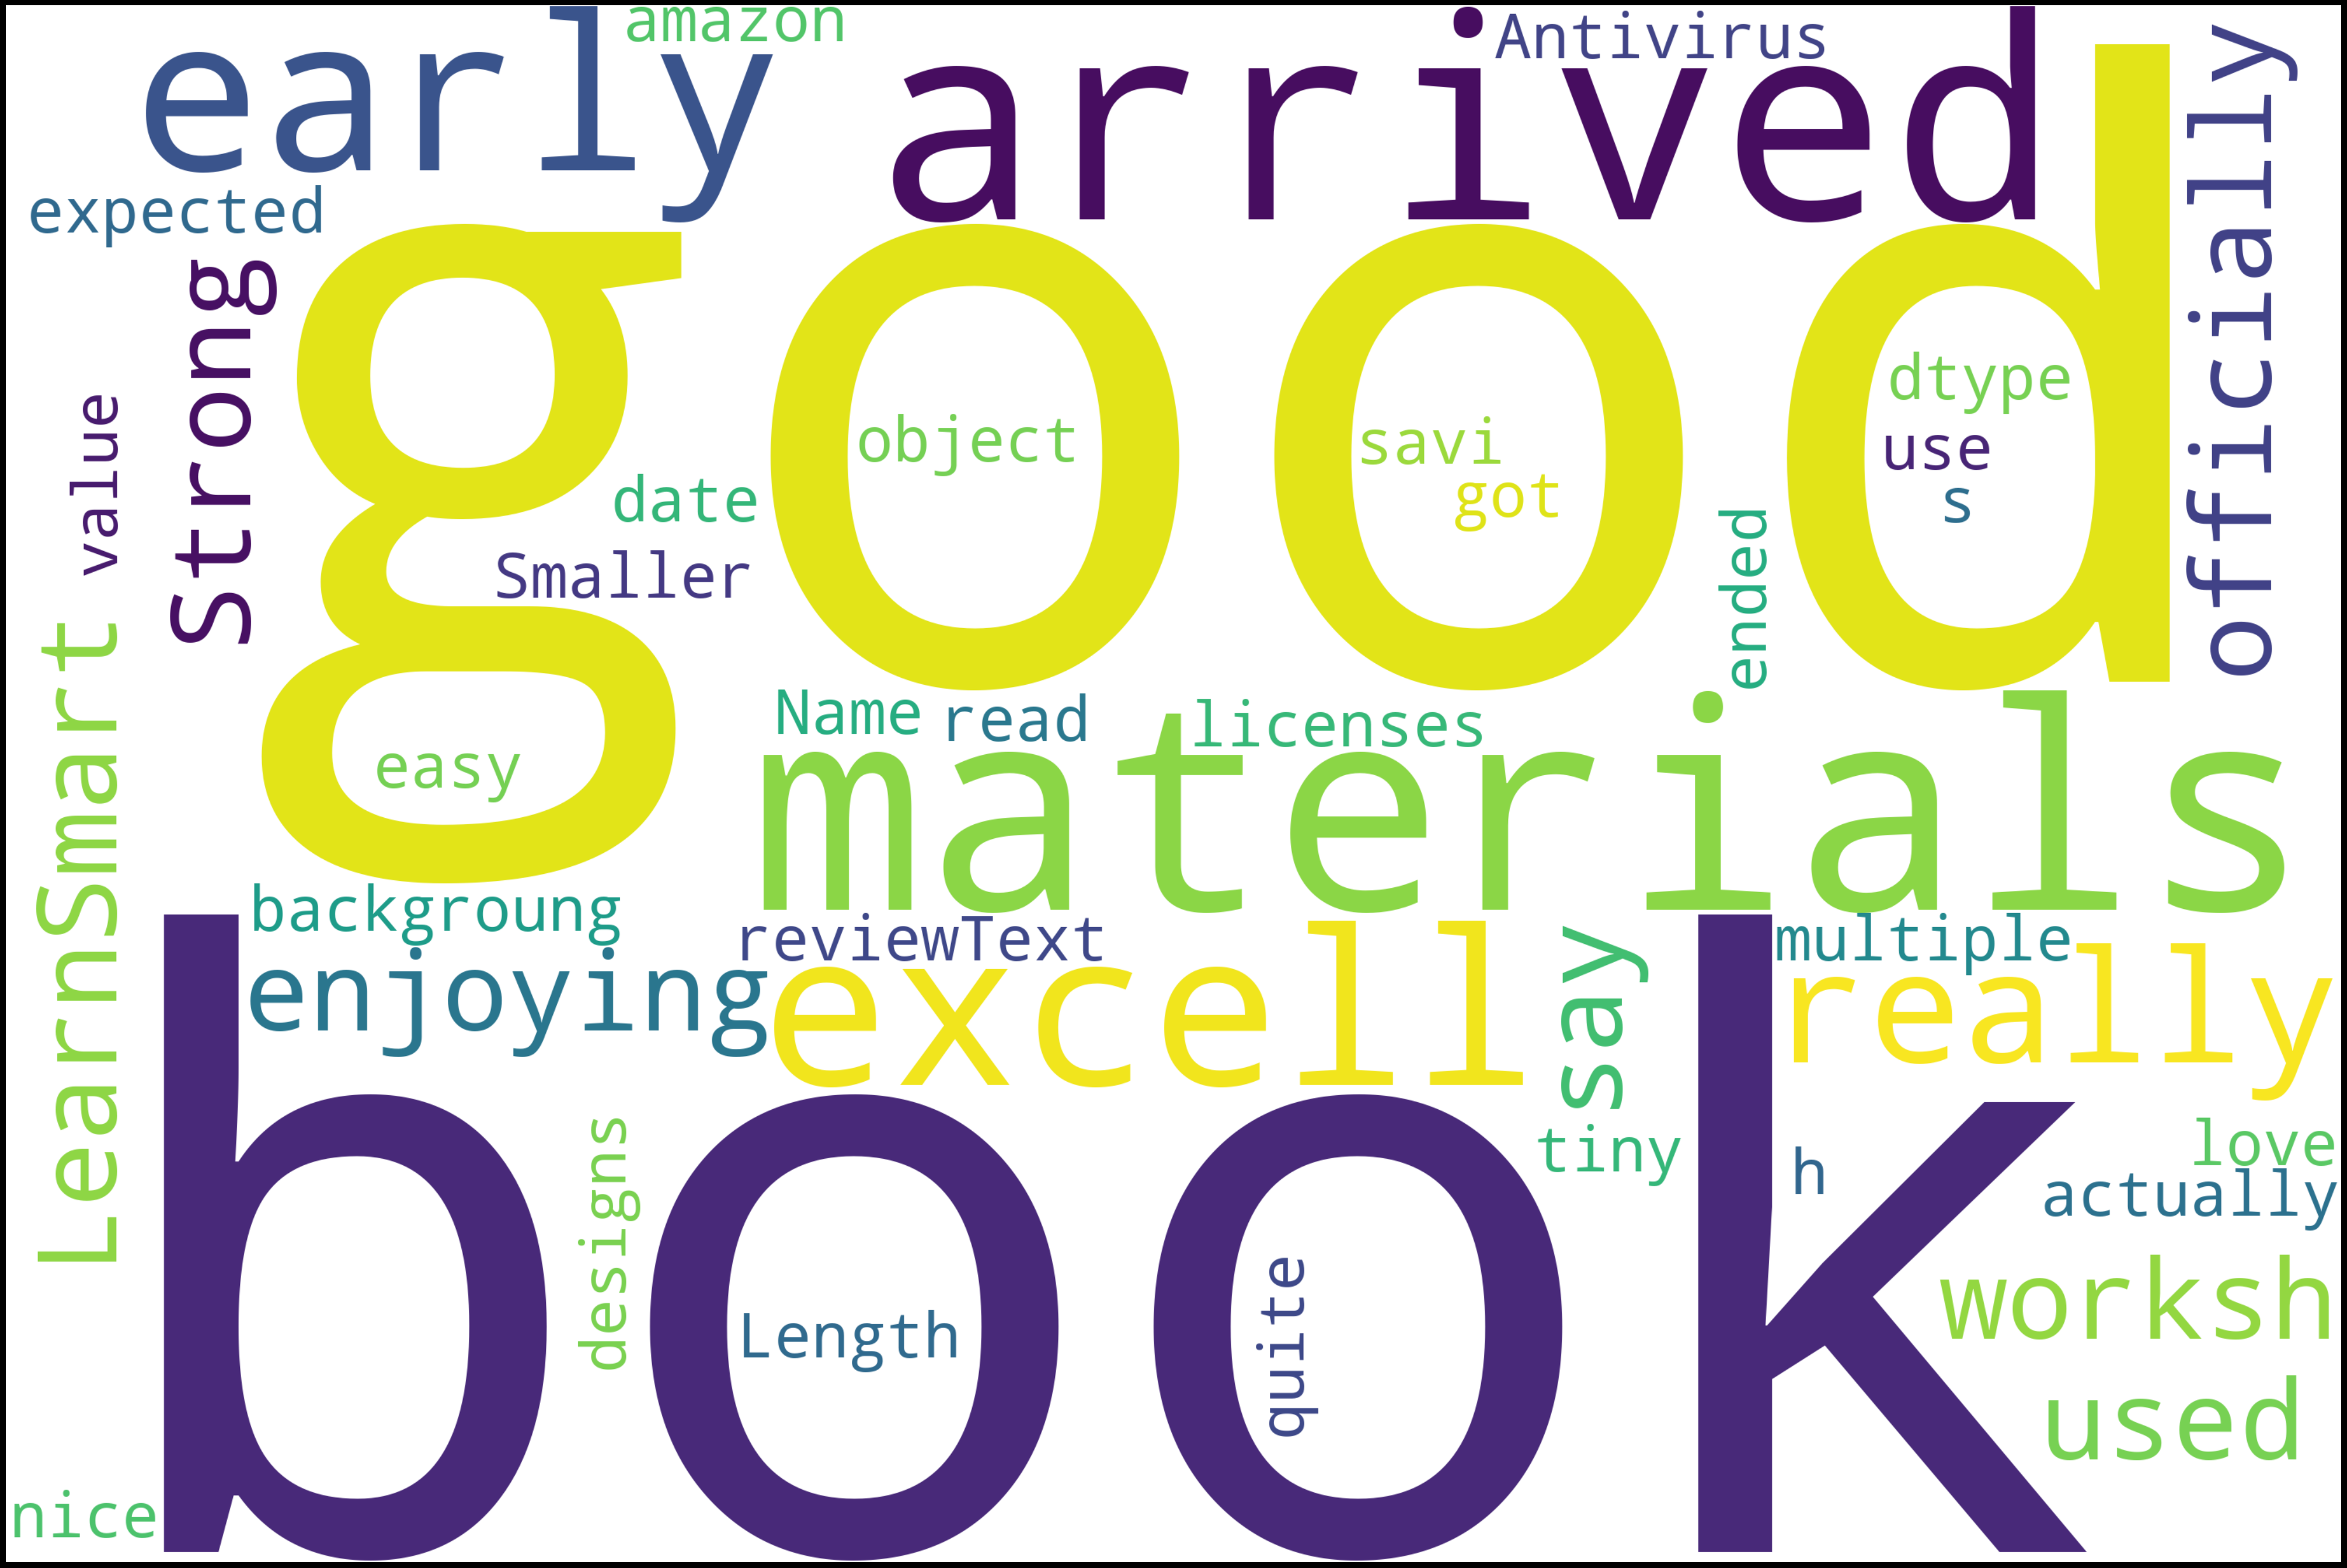

In [35]:
##Wordcloud before
positive = df[df['Sentiment']==1]
negative = df[df['Sentiment']==0]

#build negativr wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm

text = positive.reviewText
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

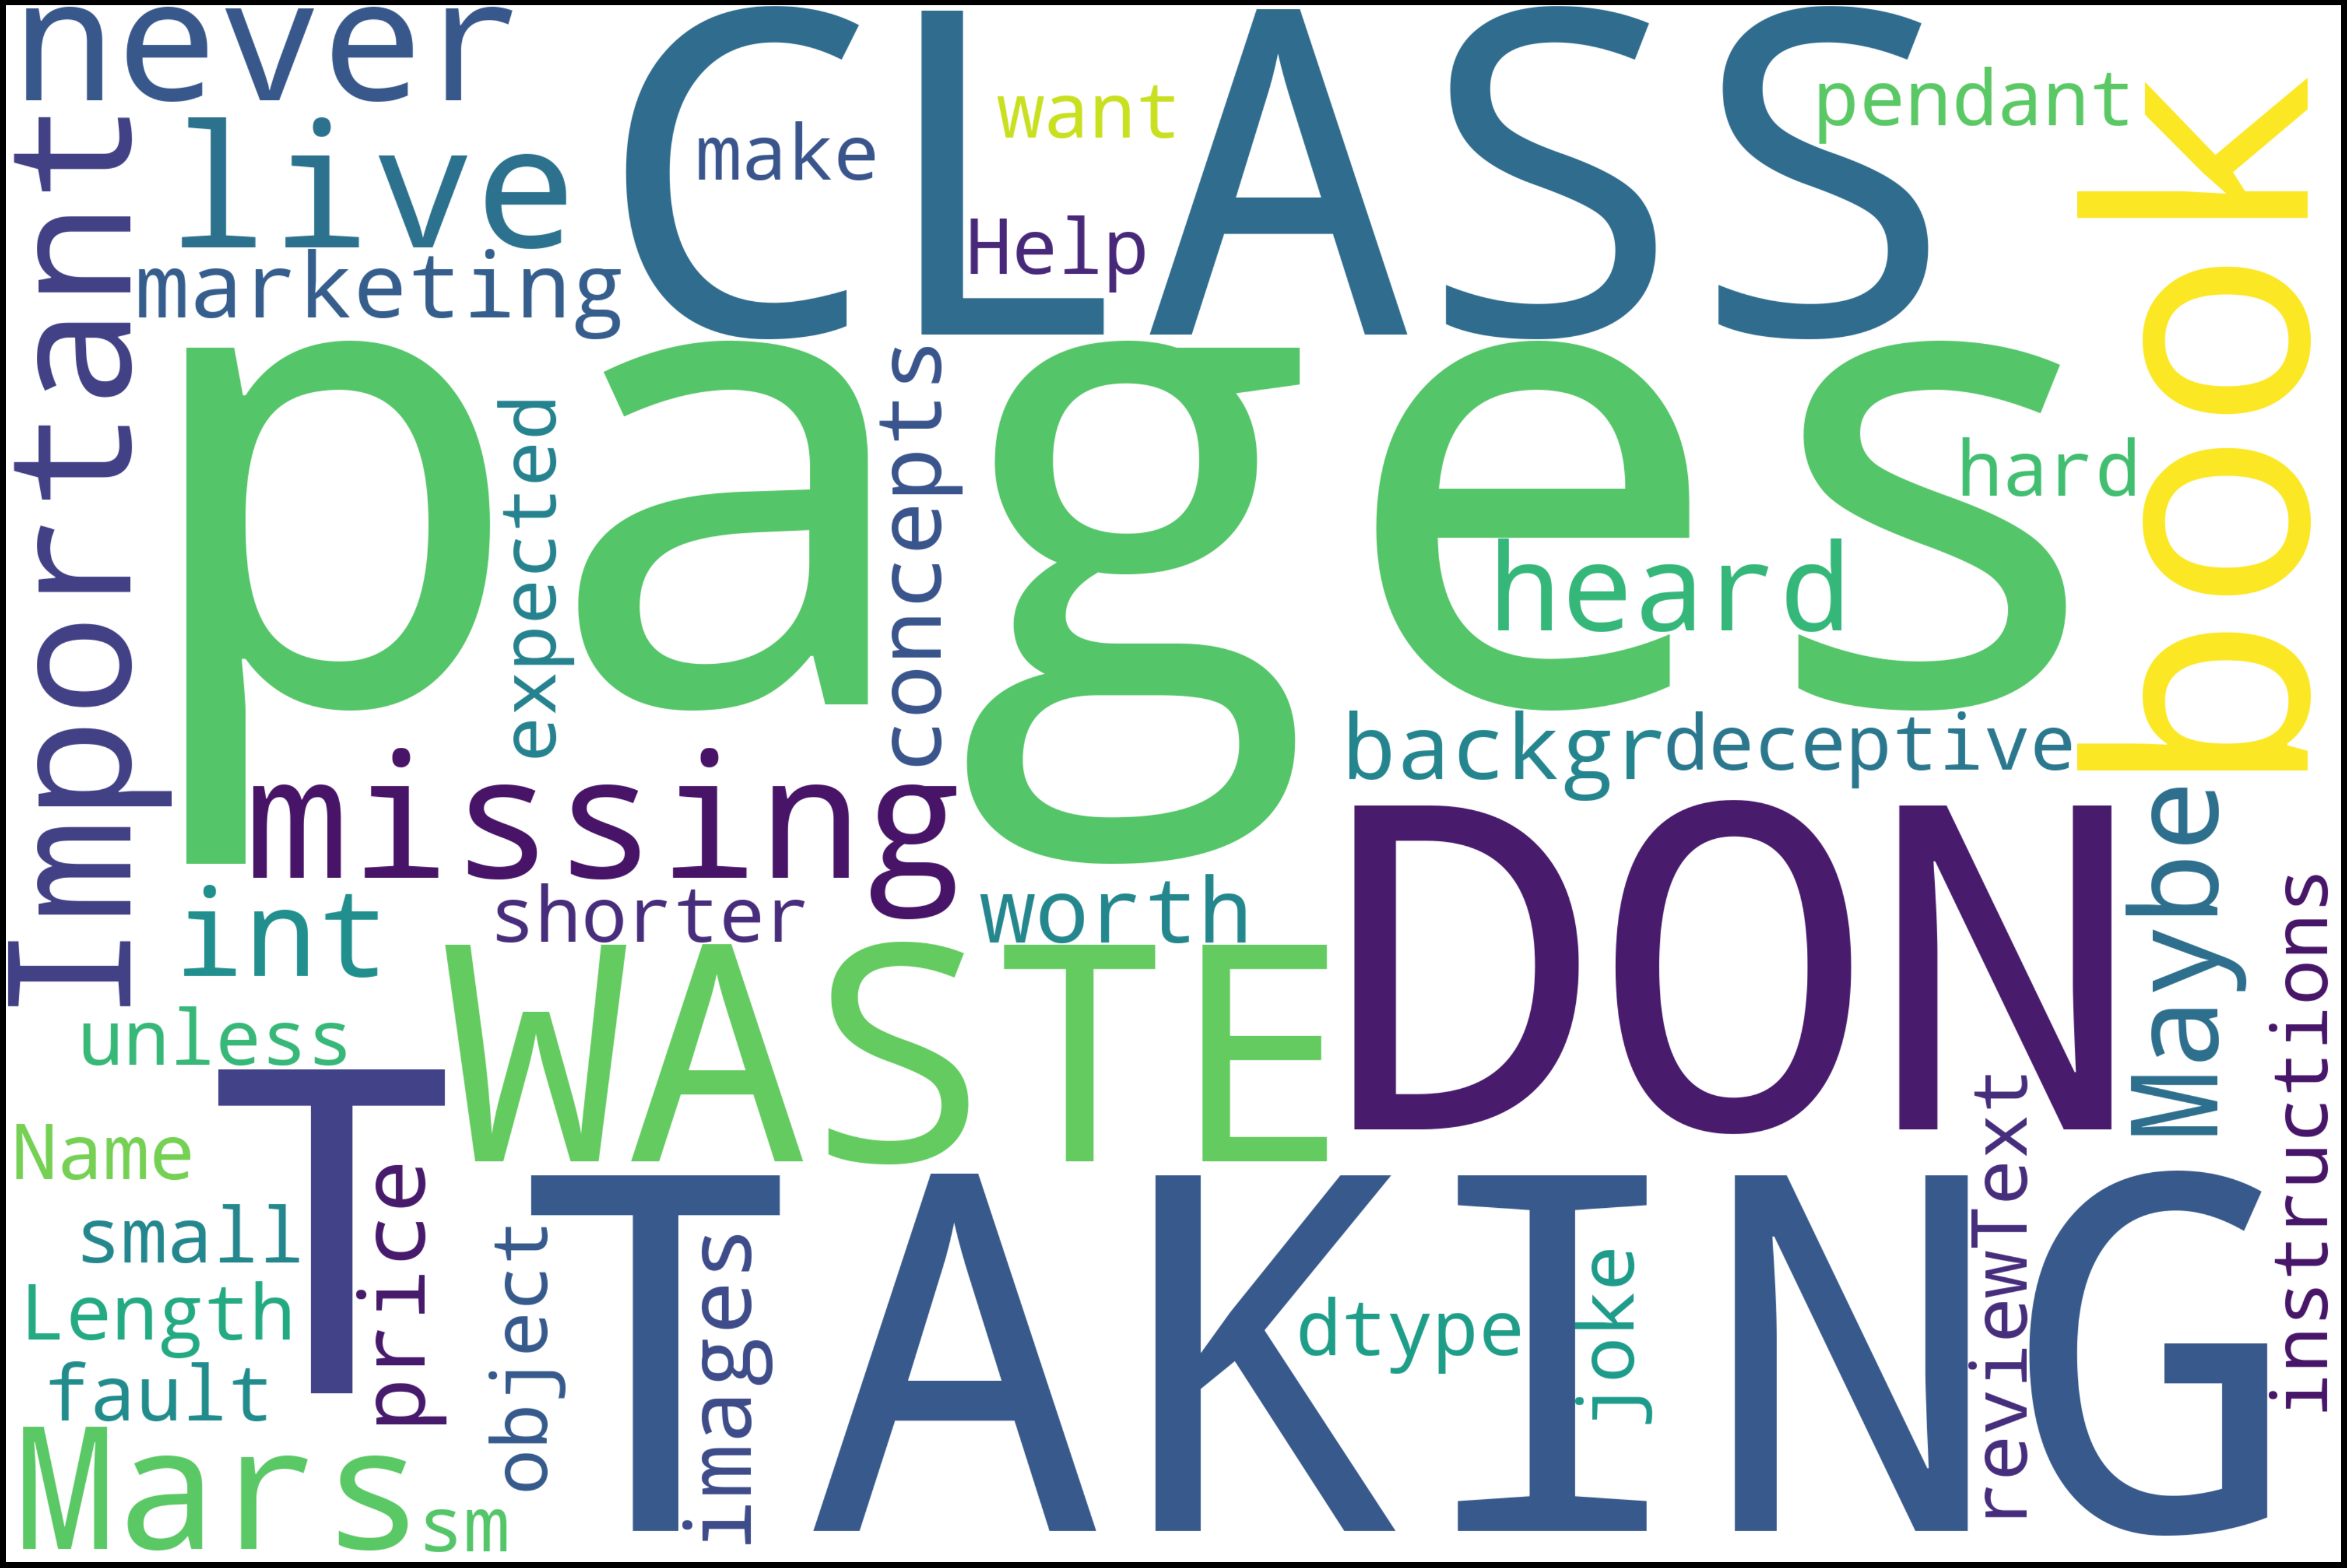

In [36]:
#build negative wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm

text = negative.reviewText
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [37]:
negative.head()

overall   reviewTime                                         reviewText  \
2       1.0  02 17, 2014  IF YOU ARE TAKING THIS CLASS DON"T WASTE YOUR ...   
3       3.0  02 17, 2014  This book was missing pages!!! Important pages...   
6       3.0   10 9, 2010  If you live on Mars and never heard of the int...   
10      2.0   05 3, 2009  Maybe it's just me (I have no marketing backgr...   
12      2.0  06 23, 2013  Not worth the price. Most of the concepts are ...   

                                    summary year_review  Sentiment  
2                        ARE YOU KIDING ME?        2014          0  
3                           missing pages!!        2014          0  
6   Mars calling Earth....what is internet?        2010          0  
10                 This book is intolerable        2009          0  
12                          Very simplistic        2013          0

In [41]:
from textblob import TextBlob
def lemmatize_with_postag(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J":'a',"N":'n',"V":'v',"R":'r'}
    words_and_tags = [(w, tag_dict.get(pos[0],'n'))for w, pos in sent.tags]
    lemmatized_list = [wd.lemmatize(tag)for wd, tag in words_and_tags]
    return " ".join(lemmatized_list)

import string
import nltk
from nltk.corpus import stopwords
import re
def normalizer(text):
    punct = list(string.punctuation)
    stop_words = stopwords.words('english')
    additional_stop_words = ['...','http','www']
    stopword_list = punct + stop_words + additional_stop_words
    
    text = re.sub("#",  " ", text)           # Replace pattern # -> ' '
    text = re.sub("dont|not|isnt|doesnt|arent|aint", "negation", text) #contains negation
    text = re.sub("(@[A-Za-z0-9]+)", " ", text)
    text_ = re.sub("(\w+:\/\/\S+)", " ", text)
    text__ = re.sub("[^a-zA-Z]", " ", text_)
    lemmatized = lemmatize_with_postag(text__)
    tokens = nltk.word_tokenize(lemmatized)[2:]
    lower_case = [l.lower() for l in tokens]
    filtered_result = list(filter(lambda l: l not in stopword_list, lower_case))
    return filtered_result

In [42]:
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\T-Gamer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('wordnet')

#remove Null texts
df=df[~df['reviewText'].isnull()]
df['normalized'] = df.reviewText.apply(normalizer)
df['normal'] = [' '.join(map(str, l)) for l in df['normalized']]
df.head(10)

overall   reviewTime                                         reviewText  \
0      4.0  03 11, 2014  The materials arrived early and were in excell...   
1      4.0  02 23, 2014  I am really enjoying this book with the worksh...   
2      1.0  02 17, 2014  IF YOU ARE TAKING THIS CLASS DON"T WASTE YOUR ...   
3      3.0  02 17, 2014  This book was missing pages!!! Important pages...   
4      5.0  10 14, 2013  I have used LearnSmart and can officially say ...   
5      4.0  08 15, 2011  Strong backgroung, good read, quite up to date...   
6      3.0   10 9, 2010  If you live on Mars and never heard of the int...   
7      5.0   10 3, 2010  i got this book on amazon and it ended up savi...   
8      5.0   10 3, 2010  I was very happy with this purchase because th...   
9      5.0  05 23, 2010  Recieved in a timely manner- book in great con...   

                                   summary year_review  Sentiment  \
0                           Material Great        2014          1   
1                                   Health        2014          1   
2                       ARE YOU KIDING ME?        2014          0   
3                          missing pages!!        2014          0   
4            Best study product out there!        2013          1   
5                       E-marketing 6th ed        2011          1   
6  Mars calling Earth....what is internet?        2010          0   
7       good book, saved me a lot of money        2010          1   
8                               Super fast        2010          1   
9                              E-Marketing        2010          1   

                                          normalized  \
0  [arrive, early, excellent, condition, however,...   
1  [really, enjoy, book, worksheet, make, review,...   
2  [taking, class, waste, money, called, book, bo...   
3  [miss, page, important, page, answer, test, qu...   
4  [use, learnsmart, officially, say, amazing, st...   
5  [good, read, quite, date, take, holistic, appr...   
6   [live, mars, never, heard, internet, good, book]   
7  [book, amazon, end, save, lot, money, great, c...   
8   [happy, purchase, shipment, super, fast, thanks]   
9  [timely, manner, book, great, condition, marki...   

                                              normal  
0  arrive early excellent condition however money...  
1  really enjoy book worksheet make review goal n...  
2  taking class waste money called book book isin...  
3  miss page important page answer test question ...  
4  use learnsmart officially say amazing study to...  
5  good read quite date take holistic approach su...  
6           live mars never heard internet good book  
7  book amazon end save lot money great condition...  
8          happy purchase shipment super fast thanks  
9  timely manner book great condition marking led...

In [44]:
df.to_pickle("full_dataset_normalized.pkl")

In [45]:
##read dataset
df = pd.read_pickle("full_dataset_normalized.pkl")

In [46]:
##Wordcloud before
positive = df[df['Sentiment']==1]
negative = df[df['Sentiment']==0]

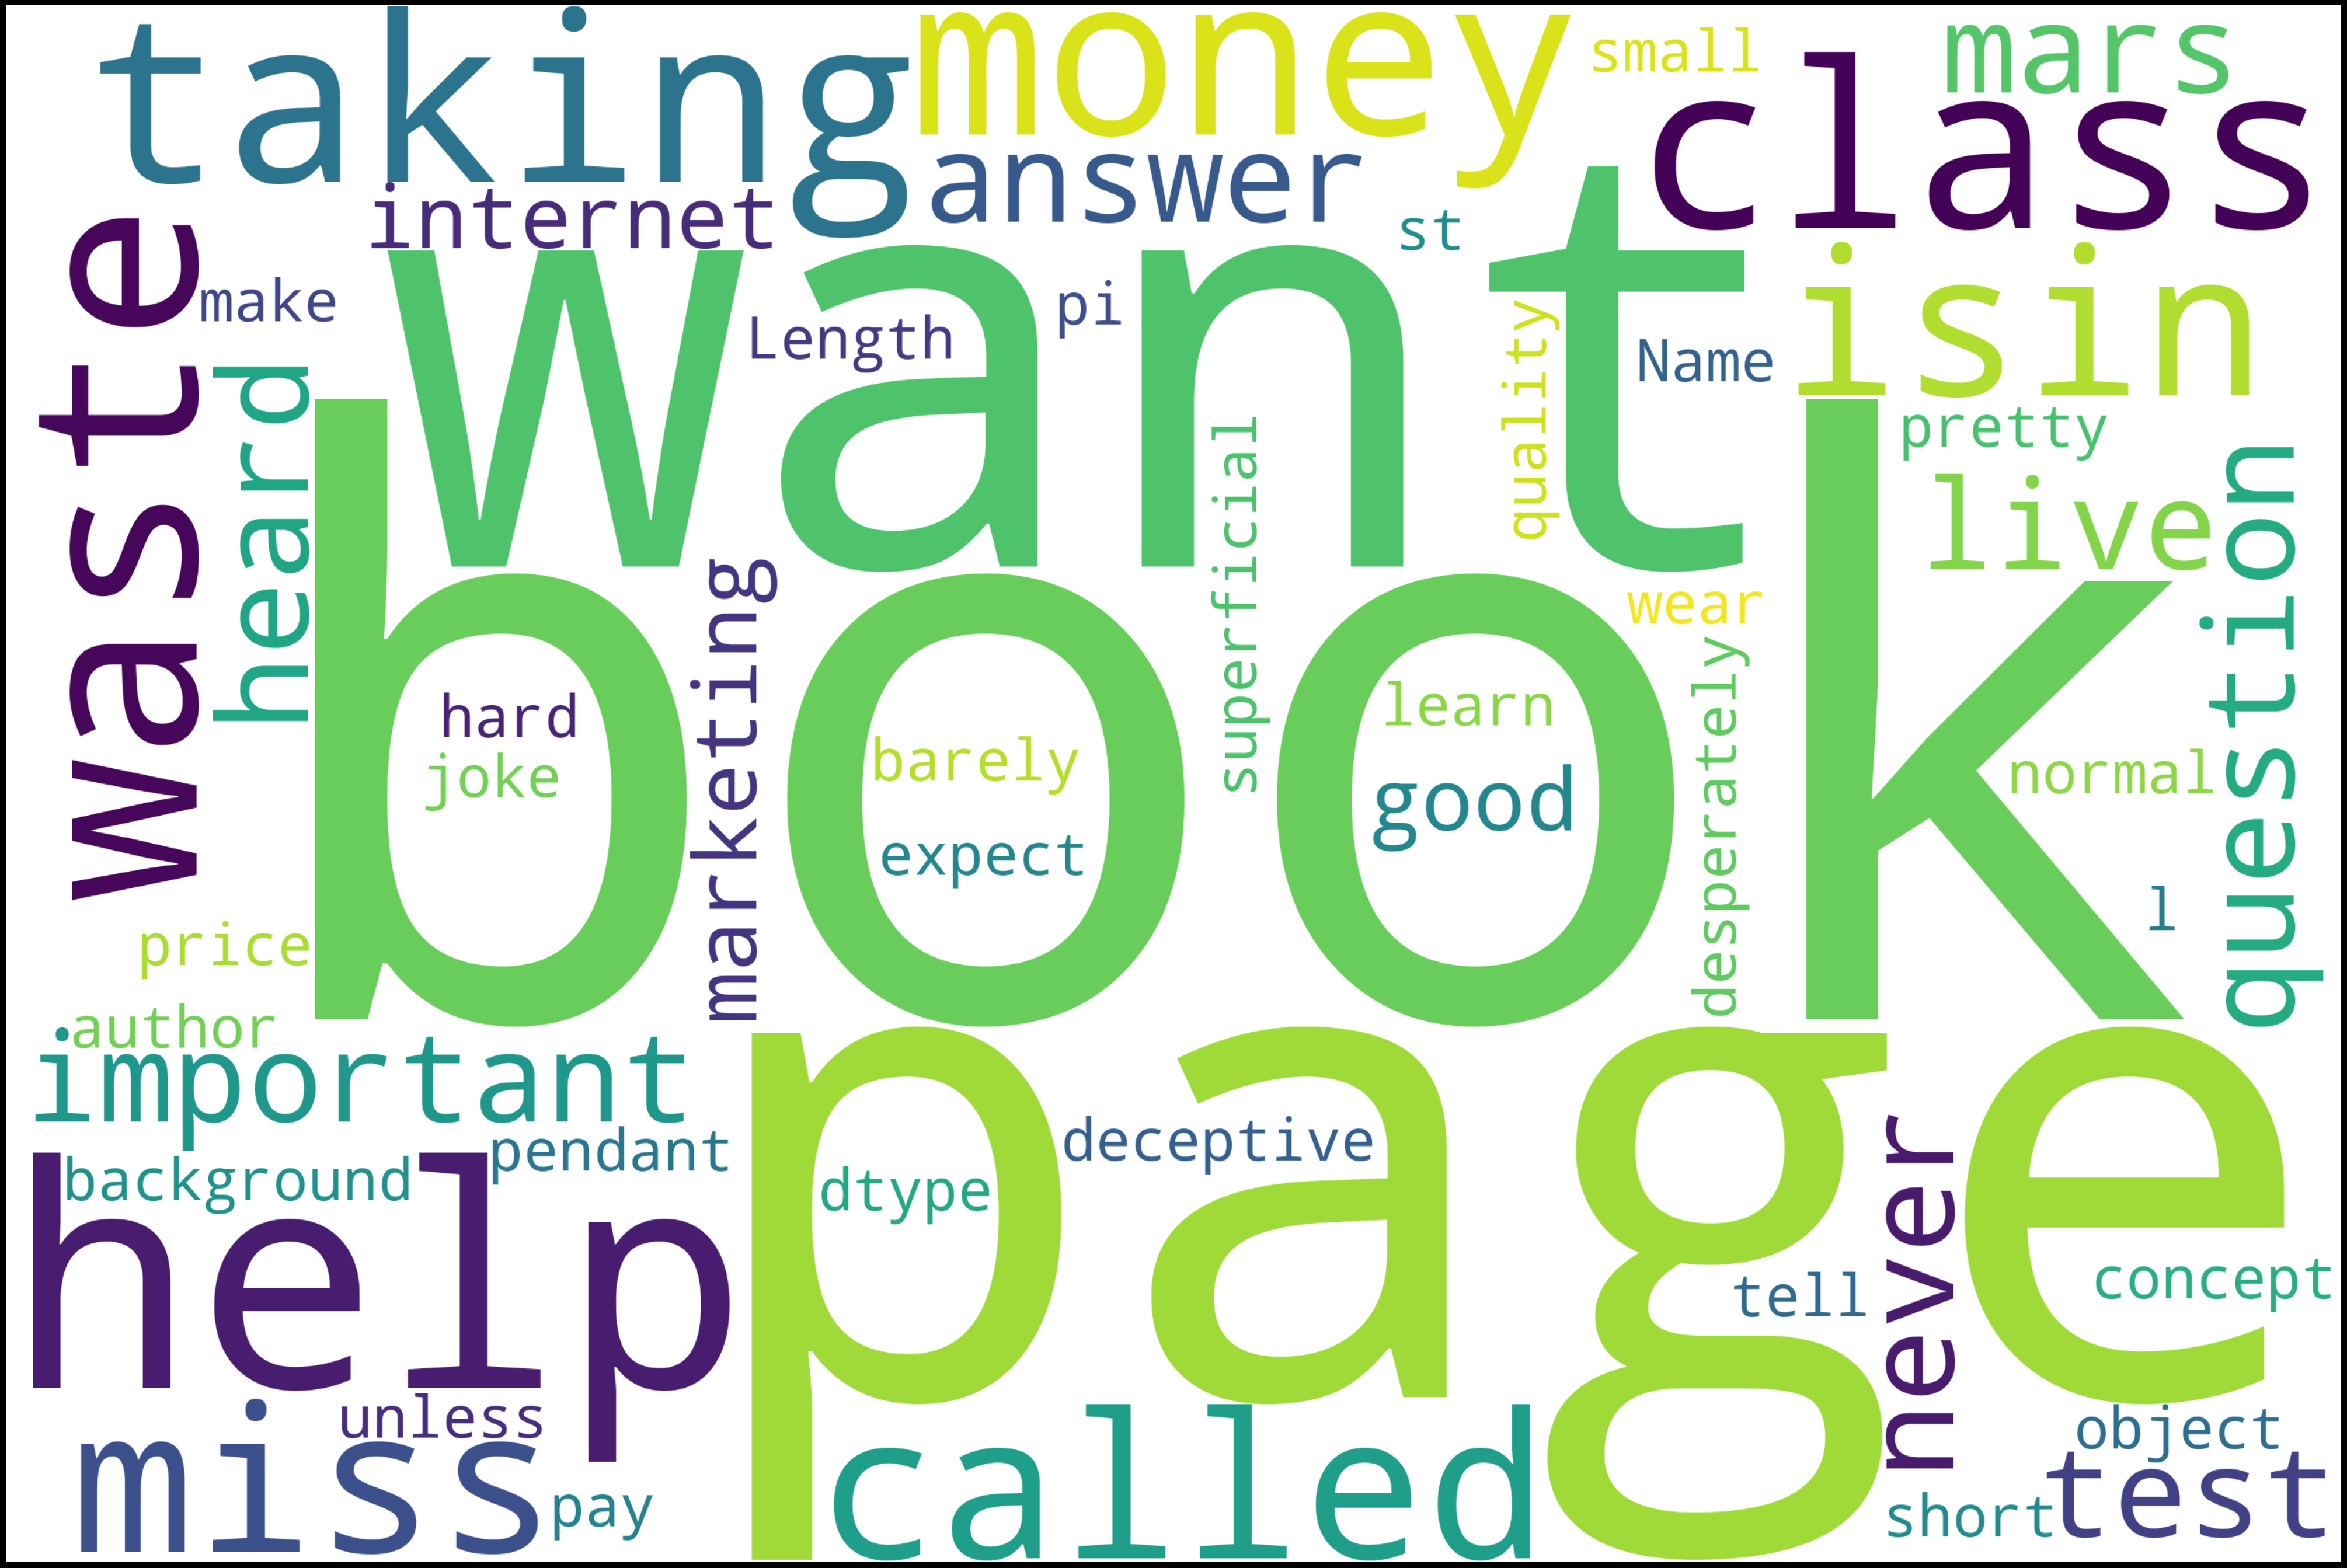

<Figure size 640x480 with 0 Axes>

In [49]:
#build negative wordcloud
text = negative.normal
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

plt.savefig("Images/wordcloud_negative.png")

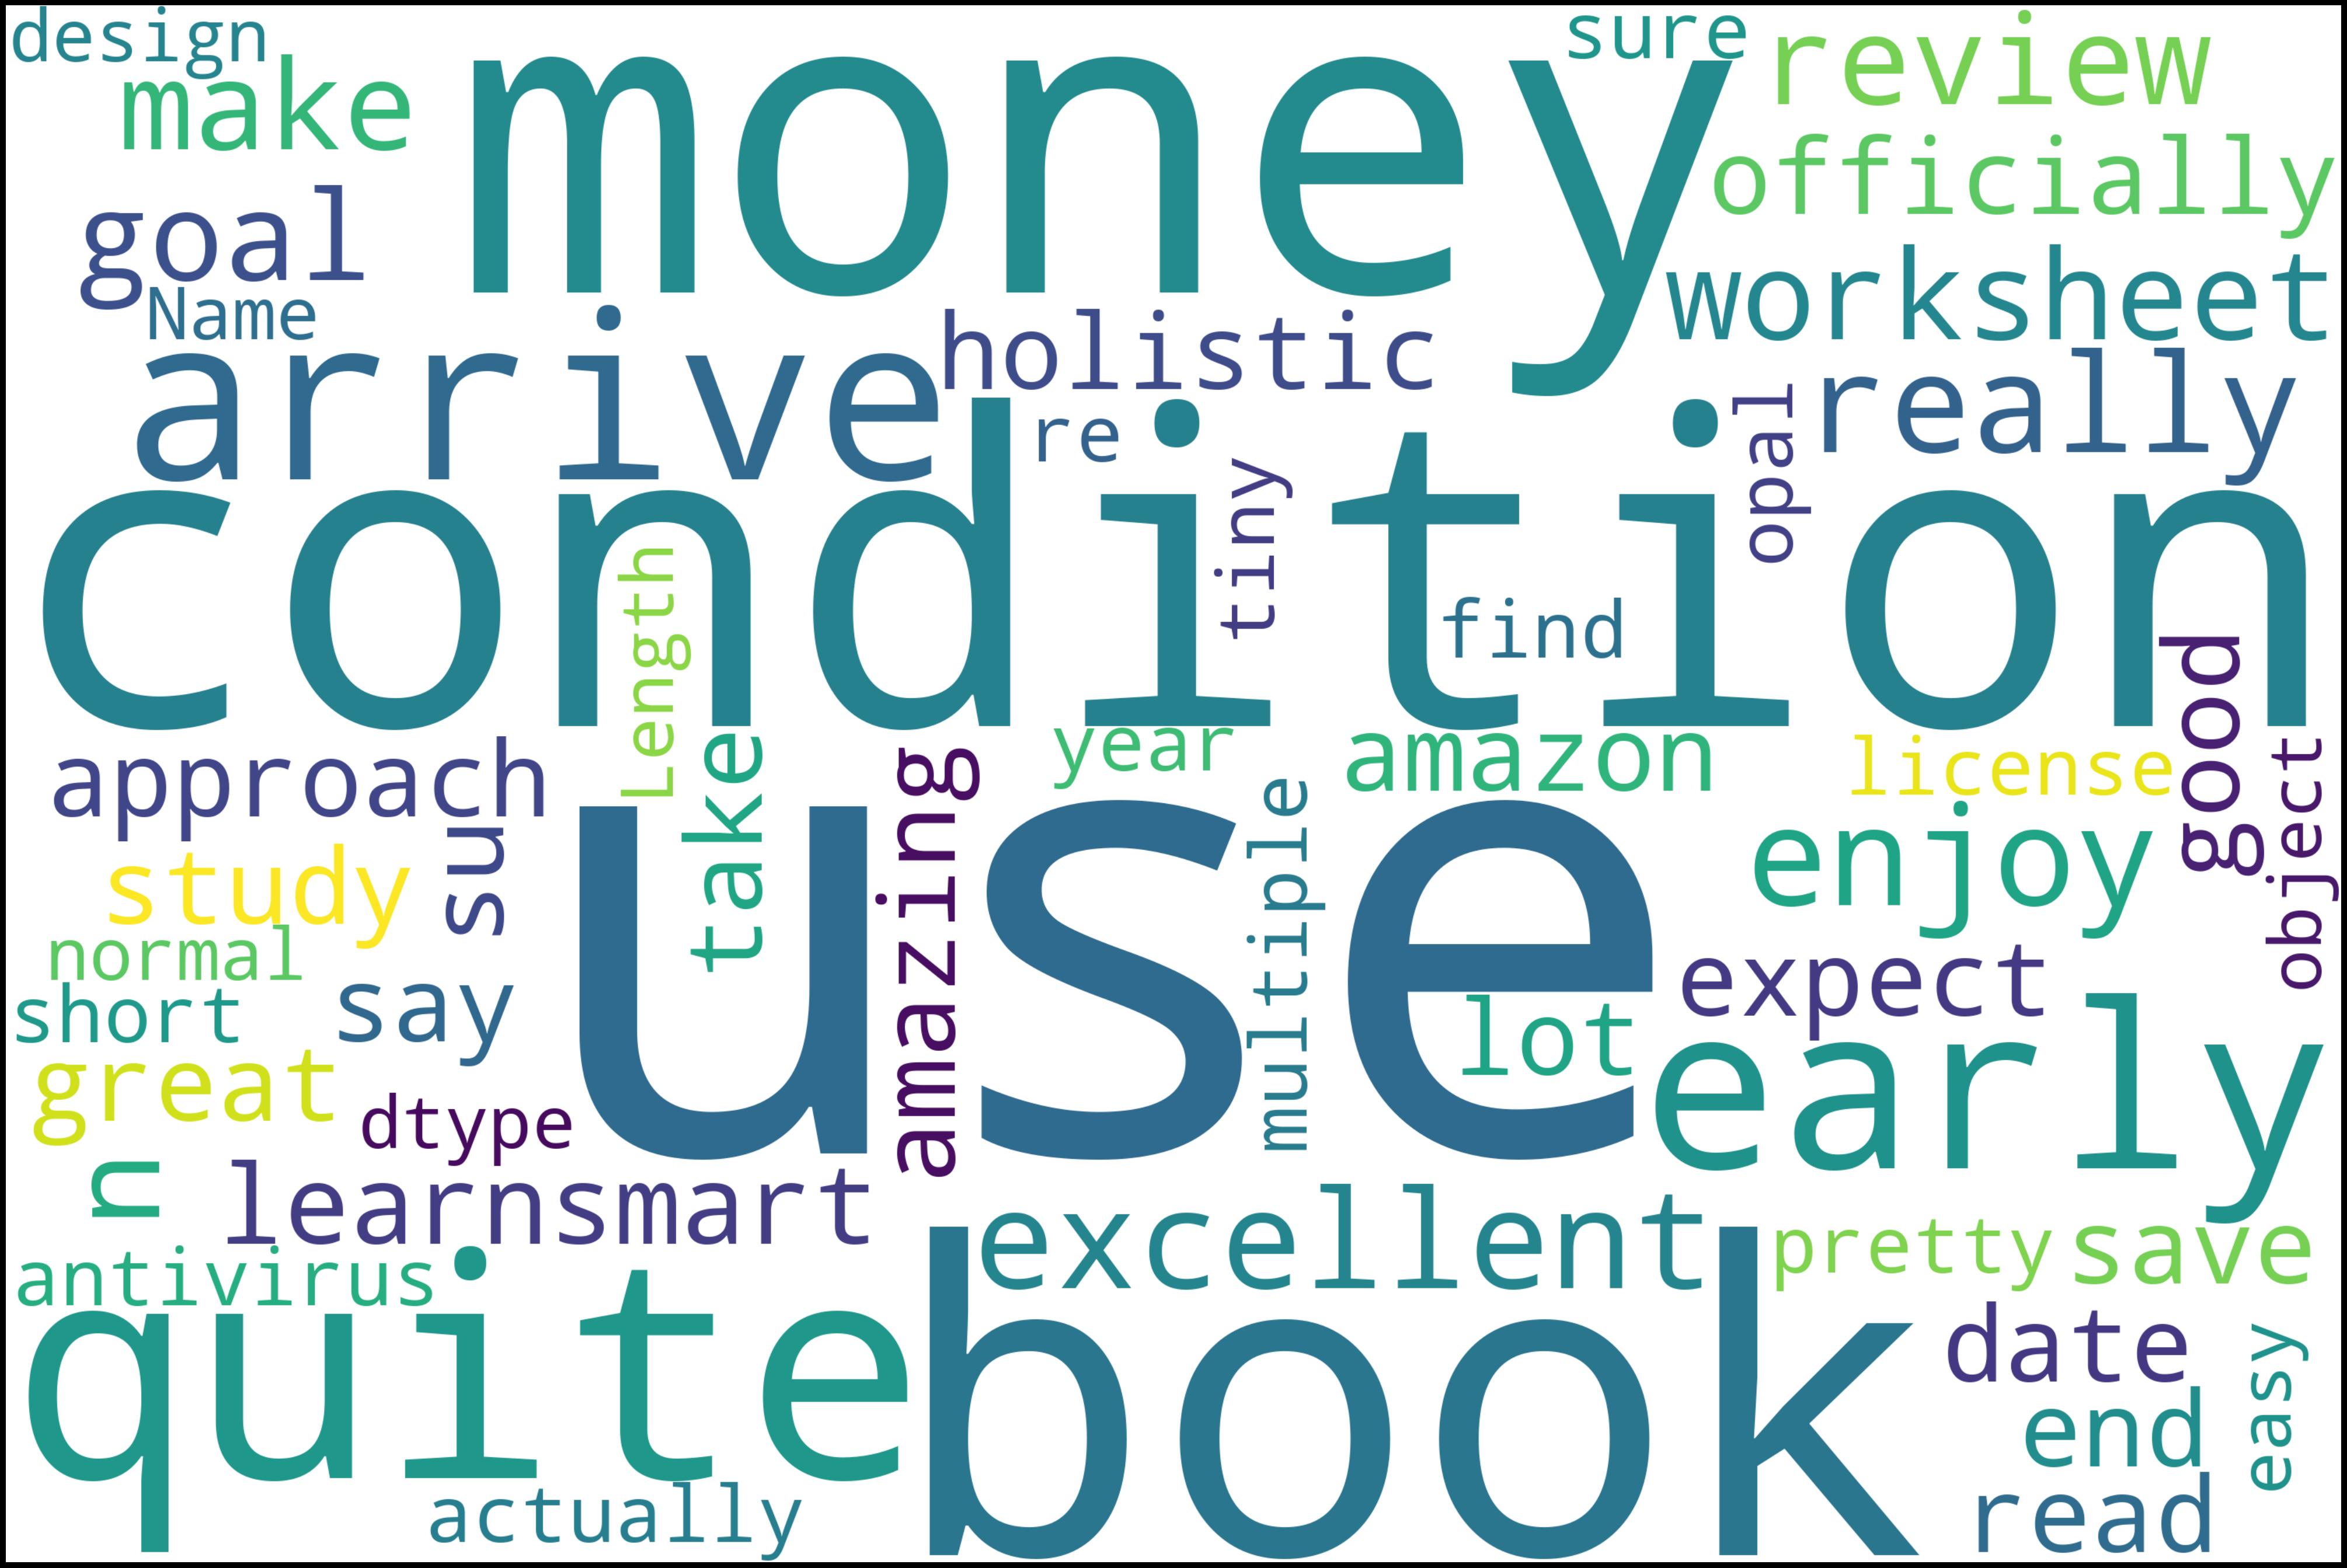

<Figure size 640x480 with 0 Axes>

In [50]:
#build positive wordcloud
text = positive.normal
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

plt.savefig("Images/wordcloud_positive.png")

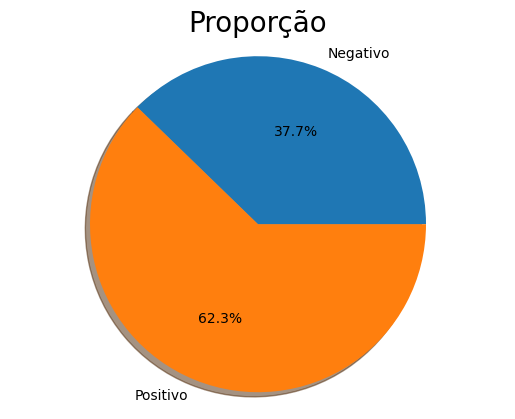

<Figure size 640x480 with 0 Axes>

In [52]:
labels = ['Negativo', 'Positivo']
sizes = [df['Sentiment'].value_counts()[0],
         df['Sentiment'].value_counts()[1]
        ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title('Proporção', fontsize=20)
plt.show()

plt.savefig("Images/proporcao_neg_pos.png")

In [53]:
### count vectorize then model trainings

from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer  

count_vectorizer = CountVectorizer(ngram_range=(1,2))
vectorized_data =count_vectorizer.fit_transform(df['normal'])

#tfidfconverter = TfidfTransformer()  
#tfid_data = tfidfconverter.fit_transform(vectorized_data)

#indexed_data =hstack((np.array(range(0,tfid_data.shape[0]))[:,None],tfid_data))

#vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
#final_features = vectorizer.fit_transform(train['normal'])

indexed_data =hstack((np.array(range(0,vectorized_data.shape[0]))[:,None],vectorized_data))
#indexed_data =hstack((np.array(range(0,final_features.shape[0]))[:,None],final_features))

vectorized_data.shape
#tfid_data.shape
#final_features.shape

(459370, 3687868)

In [54]:
df.columns

Index(['overall', 'reviewTime', 'reviewText', 'summary', 'year_review',
       'Sentiment', 'normalized', 'normal'],
      dtype='object')

In [55]:
df = df[['overall', 'reviewTime', 'reviewText', 'summary', 'year_review', 'normalized', 'normal', 'Sentiment']]
df.head()

overall   reviewTime                                         reviewText  \
0      4.0  03 11, 2014  The materials arrived early and were in excell...   
1      4.0  02 23, 2014  I am really enjoying this book with the worksh...   
2      1.0  02 17, 2014  IF YOU ARE TAKING THIS CLASS DON"T WASTE YOUR ...   
3      3.0  02 17, 2014  This book was missing pages!!! Important pages...   
4      5.0  10 14, 2013  I have used LearnSmart and can officially say ...   

                         summary year_review  \
0                 Material Great        2014   
1                         Health        2014   
2             ARE YOU KIDING ME?        2014   
3                missing pages!!        2014   
4  Best study product out there!        2013   

                                          normalized  \
0  [arrive, early, excellent, condition, however,...   
1  [really, enjoy, book, worksheet, make, review,...   
2  [taking, class, waste, money, called, book, bo...   
3  [miss, page, important, page, answer, test, qu...   
4  [use, learnsmart, officially, say, amazing, st...   

                                              normal  Sentiment  
0  arrive early excellent condition however money...          1  
1  really enjoy book worksheet make review goal n...          1  
2  taking class waste money called book book isin...          0  
3  miss page important page answer test question ...          0  
4  use learnsmart officially say amazing study to...          1

In [56]:
targets = df.iloc[:, -1]

from sklearn.model_selection import train_test_split 
data_train, data_test, targets_train, targets_test =train_test_split(indexed_data, targets, test_size=0.25,random_state=100)
data_train_index = data_train[:,0]
data_train = data_train[:,1:]
data_test_index = data_test[:,0]
data_test = data_test[:,1:]

In [57]:
indexed_data

<459370x3687869 sparse matrix of type '<class 'numpy.int64'>'
	with 30492860 stored elements in COOrdinate format>

In [58]:
targets_train.value_counts(normalize=True)

Sentiment
1    0.6229
0    0.3771
Name: proportion, dtype: float64

In [59]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

warnings.filterwarnings("ignore")

In [60]:
# Define a list of classifiers
classifiers = [
    {
        'name': 'MultinomialNB',
        'classifier': MultinomialNB()
    },
    {
        'name': 'SVM',
        'classifier': LinearSVC(C=0.1)
    },
    {
        'name': 'RandomForest',
        'classifier': RandomForestClassifier(max_depth=10, n_estimators=50)
    },
    {
        'name': 'KNeighbors',
        'classifier': KNeighborsClassifier()
    }
]

# Iterate over classifiers
for clf in classifiers:
    name = clf['name']
    classifier = clf['classifier']

    # Create a pipeline without vectorization step
    pipeline = Pipeline([
        ('classifier', classifier)
    ])

    print(f"\nTesting {name}:")

    # Train the classifier on the training set
    pipeline.fit(data_train, targets_train)

    # Test the classifier on the test set
    predictions = pipeline.predict(data_test)

    # Evaluate the performance
    accuracy = accuracy_score(targets_test, predictions)
    print("Accuracy:", accuracy)
    
    print("Classification Report:")
    print(classification_report(targets_test, predictions))


Testing MultinomialNB:
Accuracy: 0.8426547547521399
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79     43460
           1       0.86      0.89      0.88     71383

    accuracy                           0.84    114843
   macro avg       0.83      0.83      0.83    114843
weighted avg       0.84      0.84      0.84    114843


Testing SVM:
Accuracy: 0.8569873653596649
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80     43460
           1       0.86      0.92      0.89     71383

    accuracy                           0.86    114843
   macro avg       0.86      0.84      0.84    114843
weighted avg       0.86      0.86      0.85    114843


Testing RandomForest:
Accuracy: 0.6224584868037234
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.00      0.01     43460
           1       0

In [61]:
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Define a list of classifiers
classifiers = [
    {
        'name': 'LogisticRegression',
        'classifier': LogisticRegression(max_iter=1000, class_weight='balanced')
    },
    {
        'name': 'MultinomialNB',
        'classifier': MultinomialNB()
    },
    {
        'name': 'SVM',
        'classifier': LinearSVC(C=0.1)
    }
]

# Iterate over classifiers
for clf in classifiers:
    name = clf['name']
    classifier = clf['classifier']

    # Create a pipeline without vectorization step
    pipeline = Pipeline([
        ('classifier', classifier)
    ])

    print(f"\nTesting {name}:")

    # Perform cross-validation and print the results
    cv_results = cross_val_score(pipeline, indexed_data, targets, cv=kf, scoring='accuracy')
    print("Cross-Validated Accuracy:", cv_results.mean())
    print("Cross-Validated Precision, Recall, and F1-score:")
    print(cross_val_score(pipeline, indexed_data, targets, cv=kf, scoring='precision_macro').mean())
    print(cross_val_score(pipeline, indexed_data, targets, cv=kf, scoring='recall_macro').mean())
    print(cross_val_score(pipeline, indexed_data, targets, cv=kf, scoring='f1_macro').mean())


Testing LogisticRegression:
Cross-Validated Accuracy: 0.3774321353145969
Cross-Validated Precision, Recall, and F1-score:
0.18871606765729845
0.5
0.27401141997066314

Testing MultinomialNB:
Cross-Validated Accuracy: 0.6985044709562377
Cross-Validated Precision, Recall, and F1-score:
0.679333602774738
0.6536902332964806
0.6582897653121816

Testing SVM:
Cross-Validated Accuracy: 0.637451268957299
Cross-Validated Precision, Recall, and F1-score:
0.724896997042943
0.5593337788481351
0.449273651852766


In [62]:
##Choosing SVC and Naive Bayes for hyperparmeter tuning

from sklearn.model_selection import GridSearchCV, StratifiedKFold

param_grid_linear_svc = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

linear_svc_classifier = LinearSVC()

grid_search_linear_svc = GridSearchCV(linear_svc_classifier, param_grid_linear_svc, cv=3, scoring='f1_macro')
grid_search_linear_svc.fit(data_train, targets_train)

GridSearchCV(cv=3, estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [63]:
warnings.filterwarnings("ignore")

best_params_linear_svc = grid_search_linear_svc.best_params_
best_model_linear_svc = grid_search_linear_svc.best_estimator_

print(f"Best parameters for Linear SVC: {best_params_linear_svc}")
print(F"Best model: {best_model_linear_svc}")

Best parameters for Linear SVC: {'C': 0.1, 'penalty': 'l2'}
Best model: LinearSVC(C=0.1)


In [64]:
#Naive Bayes
param_grid_nb = {
    'alpha': [0.1, 1, 10]
}

nb_classifier = MultinomialNB()

grid_search_nb = GridSearchCV(nb_classifier, param_grid_nb, cv=3, scoring='f1_macro')
grid_search_nb.fit(data_train, targets_train)

best_params_nb = grid_search_nb.best_params_
best_model_nb = grid_search_nb.best_estimator_

print(f"Best parameters for NB: {best_params_nb}")
print(F"Best model: {best_model_nb}")

Best parameters for NB: {'alpha': 1}
Best model: MultinomialNB(alpha=1)


In [65]:
#Compare both models
from sklearn.metrics import classification_report, confusion_matrix

linear_svc_classifier = LinearSVC(C=best_params_linear_svc['C'], penalty=best_params_linear_svc['penalty'])

linear_svc_classifier.fit(data_train, targets_train)

# Make predictions on the test set
predictions_linear_svc = linear_svc_classifier.predict(data_test)

# Evaluate the performance with a classification report and confusion matrix
print("LinearSVC Classification Report:")
print(classification_report(targets_test, predictions_linear_svc))
print("\nLinearSVC Confusion Matrix:")
print(confusion_matrix(targets_test, predictions_linear_svc))

LinearSVC Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80     43460
           1       0.86      0.92      0.89     71383

    accuracy                           0.86    114843
   macro avg       0.86      0.84      0.84    114843
weighted avg       0.86      0.86      0.85    114843


LinearSVC Confusion Matrix:
[[32519 10941]
 [ 5483 65900]]


In [66]:
nb_classifier = MultinomialNB(alpha=best_params_nb['alpha'])

# Train the Naive Bayes model on the entire training set
nb_classifier.fit(data_train, targets_train)

# Make predictions on the test set
predictions_nb = nb_classifier.predict(data_test)

# Evaluate the performance with a classification report and confusion matrix
print("Naive Bayes Classification Report:")
print(classification_report(targets_test, predictions_nb))
print("\nNaive Bayes Confusion Matrix:")
print(confusion_matrix(targets_test, predictions_nb))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79     43460
           1       0.86      0.89      0.88     71383

    accuracy                           0.84    114843
   macro avg       0.83      0.83      0.83    114843
weighted avg       0.84      0.84      0.84    114843


Naive Bayes Confusion Matrix:
[[33382 10078]
 [ 7992 63391]]


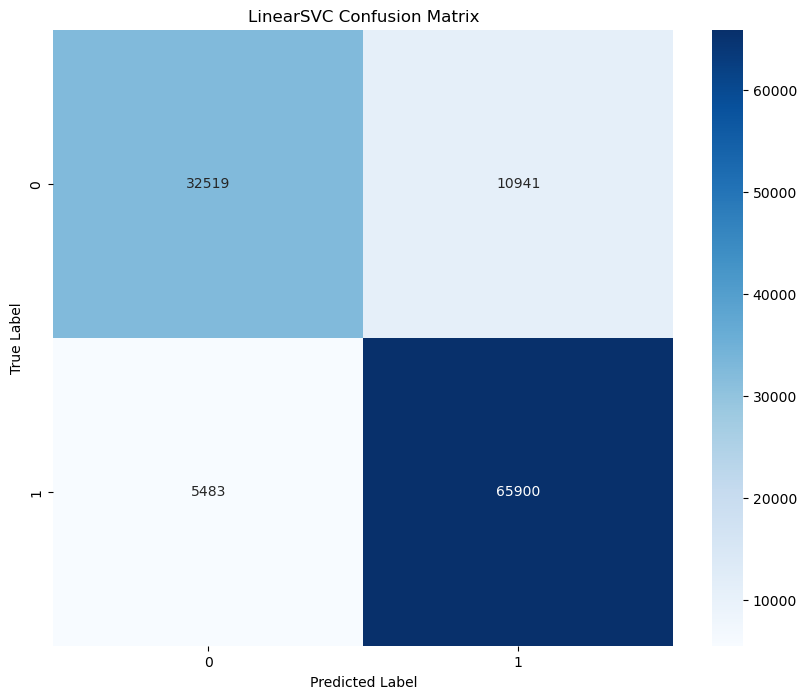

In [67]:
#Linear SVC it is
# Display the confusion matrix using seaborn heatmap

# Get the confusion matrix
cm_svc = confusion_matrix(targets_test, predictions_linear_svc)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues')
plt.title('LinearSVC Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [35]:
type(data_test)

scipy.sparse._csr.csr_matrix

In [40]:
data_test.head()

AttributeError: 'csr_matrix' object has no attribute 'head'

In [ ]:
joblib.d